# Input Description

Job  Machine
3    5
Job# Machine#   M1     M2     M3            VG
1    3          1  10  2  30  3  20         1
1    4          1  12  5  13  3  21  4  28  2
1    3          1  21  2  10  3  11         3

3 5
1 3 1 10 2 30 3 20 1
1 4 1 12 5 13 3 21 4 28 2
1 3 1 21 2 10 3 11 3

# Data Parsing

In [1]:
from collections import Counter
import random

def readFile(filePath):
    with open(filePath) as fp:
        line = fp.readline()
        nm = line.strip().split()
        machineCnt = nm[1]
        jobs = []
        machines = []
        processing_time = []
        multi_ops = []
        VG = []
        for i in range(int(nm[0])):
            line = fp.readline()
            cv = list(map(int, line.split()))
            operations = []
            times = []
            j = 0

            # 각 op 별 machine, processing_time 할당
            # operation 개수
            k = cv[j]

            for kj in range(k):
                operation = []
                machine_l = []
                j = j + 1
                end = (cv[j] * 2) + 1
                if kj > 0:
                    operation = []
                for h in range(cv[j]):    
                    j += 1
                    machine = cv[j]
                    j += 1
                    if (j >= len(cv)):
                        continue;
                    # processing_time 할당
                    processing_t = cv[j]
                    machine_l.append(machine)
                    processing_time.append(processing_t)
                    operation.append({'machine': machine, 'processingTime': processing_t})
                operations.append(operation)  
                machines.append(machine_l)
            
            # VG 할당
            vgcnt = 0
            VG_L = [[] for i in range(cv[0])]
            
            for v in range(cv[0]):
                vgcnt = (-v -1)
                VG_L[v].append(int(cv[vgcnt]))

            VG_L.reverse()
            VG.append(VG_L)

            if len(operations) > 1:
                for o in range(len(operations)):
                    if o > 0:
                        # multi_ops.append([operations[o]])
                        jobs[i] += [operations[o]]
                    else:
                        jobs.append([operations[o]])
            else:
                jobs.append(operations)
        # jobs += multi_ops
        
    return jobs, VG, machines, processing_time, {'machineCnt': int(machineCnt), 'jobs': jobs}


In [2]:
jobs, VG, machines, processing_time, jobDicts = readFile("./test_data.txt")

# Population Generation

In [3]:
def re_arrange_jobdict(VG, jobDicts):
    for i in range(len(VG)):
        cnt = 0
        for j in VG[i]:
            if j[0] > 1:
                for k in range(j[0]):
                    if k > 0:
                        jobDicts['jobs'][i].insert(cnt, jobDicts['jobs'][i][cnt])
                        cnt += 1
            cnt += 1
    return jobDicts

In [4]:
jobDicts = re_arrange_jobdict(VG, jobDicts)

In [5]:
from itertools import permutations
def perm_table(VG, machines):
    VG_tables = []
    perm = []
    cnt = 0
    for j in VG:
        if len(j) > 1:
            for k in j:
                perm.append(k[0])
        else:
            perm.append(j[0][0])

    for i in perm:
        per_list = []
        for k in permutations(machines[cnt], i):
            if(len(machines[cnt]) == i) or i==1:
                continue;
            per_list.append(list(k))
        if(len(machines[cnt]) == i) or i==1:
            per_list[:0] = machines[cnt]
        VG_tables.append(per_list)
        cnt += 1
    VG_tables
    return VG_tables


In [6]:
perm_table = perm_table(VG, machines) # [1, 2, 3]

### operation 별로 분리

import random

def generateN(jobDicts, VG):
    if len(VG) > 0:
        N = [[]]
        jobs = jobDicts['jobs']
        i = 0
        for v in VG:
            cnt = 0
            for j in v:
                cnt += 1
                if cnt > 1:
                    N.append([])
                    N[cnt-1].append(i)
                else:
                    N[cnt-1].append(i)
            i += 1
        for i in N:
            random.shuffle(i)
    else:
        N = []

        jobs = jobDicts['jobs']
        i = 0
        for job in jobs:
            for op in job:
                N.append(i)
            i = i+1
        random.shuffle(N)
    return N

def generateM(jobDicts, VG):
    M = [[]]
    if(len(VG) > 0):
        cnt = 0
        for v in VG:
            j = 0
            for k in v:
                if j > 0: 
                    M.append([])
                    cnt += 1
                if(len(perm_table[cnt]) > v[j][0]):
                    random.shuffle(perm_table[cnt])
                    if(type(perm_table[cnt][0]) != int):
                        M[j] = M[j]  + perm_table[cnt][0]
                    else:
                        M[j].append(perm_table[cnt][0])
                else:
                    if(type(perm_table[cnt]) != int):
                        M[j] = M[j]  + perm_table[cnt]
                    else:
                        M[j].append(perm_table[cnt])
                j += 1
            cnt += 1
    else:
        jobs = jobDicts['jobs']
        cnt = 0
        for job in jobs:
            for op in job:
                cnt += 1
                randomMachine = random.randint(0, len(op)-1)
                M.append(randomMachine)
    return M

In [74]:
#VG 별 machine 나누기
def split_by_machine(VG, param, jobDicts):
    (n,m) = param
    job_lists = []
    current = 0
    p = 0
    k = 0
    perm = perm_rearrange(VG);
    if(len(VG) > 0):
        for v in range(len(perm)):
            outer = []
            for j in range(len(perm[v])):
                inner = []
                for i in range(perm[v][j]):
                    if v != k:
                        k += 1
                        p = 0
                        inner = []
                    inner.append(m[v][p])
                    p += 1
                outer.append(inner);
            job_lists.append(outer);
    else:
        current = 0
        for index, job in enumerate(jobDicts['jobs']):
            job_lists.append(m[current:current+len(job)])
            current += len(job)

    return job_lists

In [ ]:
# operation 이 1보다 크면 VG 크기에서 +1 한 값을 낸다.
def generateN(jobDicts, VG):
    if len(VG) > 0:
        N = []
        os = []
        jobs = jobDicts['jobs']
        n_dict = {}
        i = 0
        for v in VG:
            p = len(VG)
            cnt = 0
            for j in v:
                NN = []
                cnt += 1
                if cnt > 1:
                    [NN.append(p) for k in range(j[0])]
                    try:
                        n_dict[cnt] += NN
                    except:
                        n_dict[cnt] = NN
                        p += 1
                    random.shuffle(NN)

                else:
                    # N.append(i)
                    [N.append(i) for k in range(j[0])]
                    n_dict[cnt] = N

            i += 1
        random.shuffle(N)
        for i in n_dict.values():
            os += i
        N = os
    else:
        N = []

        jobs = jobDicts['jobs']
        i = 0
        for job in jobs:
            for op in job:
                N.append(i)
            i = i+1
        random.shuffle(N)
    return N

In [ ]:
N = []
os = []
jobs = jobDicts['jobs']
n_dict = {}
i = 0
jh = 0
for v in VG:
    p = len(VG) - 1
    cnt = 0
    for j in v:
        NN = []
        cnt += 1
        if cnt > 1:
            if jh >= 2:
                pt += 1
            else:
                pt = p + cnt
            [NN.append(pt) for k in range(j[0])]            
            random.shuffle(NN)
            try:
                n_dict[cnt] += NN
            except:
                n_dict[cnt] = NN
            jh += 1
        else:
            [N.append(i) for k in range(j[0])]
            n_dict[cnt] = N
    i += 1
random.shuffle(N)
for i in n_dict.values():
    os += i
N = os
print(n_dict)

In [ ]:
# VG 별 machine 나누기
def split_by_machine(VG, param, jobDicts):
    (n,m) =  param
    job_lists = []
    if(len(VG) > 0):
        cnt = 0
        later_list = []
        for i in range(len(VG)):
            for j in range(len(VG[i])):
                inner = []
                later = []
                h = 0
                for k in range(VG[i][j][0]):
                    if j > 0:
                        later.append(m[cnt])
                        h += 1
                    else:
                        inner.append(m[cnt])
                    cnt += 1

                if len(inner) > 0:
                    job_lists.append(inner)
                if len(later) > 0:
                    later_list.append(later)
        job_lists += later_list
    else:
        current = 0
        for index, job in enumerate(jobDicts['jobs']):
            job_lists.append(m[current:current+len(job)])
            current += len(job)

    return job_lists

### machine 한개의 리스트로 생성

In [7]:
# operation 이 1보다 크면 VG 크기에서 +1 한 값을 낸다.
def generateN(jobDicts, VG):
    if len(VG) > 0:
        N = []
        jobs = jobDicts['jobs']
        n_dict = {}
        os = []
        i = 0
        for v in VG:
            p = len(VG) - 1
            cnt = 0
            for j in v:
                NN = []
                cnt += 1
                if cnt > 1:
                    [NN.append(i) for k in range(j[0])]            
                    try:
                        n_dict[cnt] += NN
                    except:
                        n_dict[cnt] = NN
                    random.shuffle(n_dict[cnt])
                else:
                    [N.append(i) for k in range(j[0])]
                    n_dict[cnt] = N
            i += 1
        random.shuffle(N)
        for i in n_dict.values():
            os += i
        N = os
    else:
        N = []

        jobs = jobDicts['jobs']
        i = 0
        for job in jobs:
            for op in job:
                N.append(i)
            i = i+1
        random.shuffle(N)
    return N

In [8]:
def generateM(jobDicts, VG):
    M = []
    if(len(VG) > 0):
        cnt = 0
        for v in VG:
            j = 0
            for k in v:
                if j > 0: 
                    # M.append([])
                    cnt += 1
                if(len(perm_table[cnt]) > v[j][0]):
                    random.shuffle(perm_table[cnt])
                    if(type(perm_table[cnt][0]) != int):
                        M = M  + perm_table[cnt][0]
                    else:
                        M.append(perm_table[cnt][0])
                else:
                    if(type(perm_table[cnt]) != int):
                        M = M  + perm_table[cnt]
                    else:
                        M.append(perm_table[cnt])
                j += 1
            cnt += 1
    else:
        jobs = jobDicts['jobs']
        cnt = 0
        for job in jobs:
            for op in job:
                cnt += 1
                randomMachine = random.randint(0, len(op)-1)
                M.append(randomMachine)
    return M

In [9]:
def initial_generation(jobDicts, VG):
    pop_gen = []
    for i in range(200):
        NS = generateN(jobDicts, VG)
        MS = generateM(jobDicts, VG)
        pop_gen.append((NS, MS))

    return pop_gen

In [10]:
parameter = initial_generation(jobDicts, VG) # NS MS
parameter

[([1, 2, 5, 2, 5, 2, 5, 4, 4, 1, 0, 3, 3, 2, 3, 2, 1, 1, 1, 1],
  [1, 3, 5, 1, 1, 2, 5, 1, 2, 3, 5, 3, 2, 4, 2, 3, 4, 1, 2, 3]),
 ([1, 1, 4, 0, 4, 2, 5, 5, 3, 5, 2, 2, 2, 2, 3, 3, 1, 1, 1, 1],
  [2, 3, 5, 1, 1, 2, 5, 1, 2, 3, 5, 3, 1, 4, 2, 5, 1, 1, 2, 3]),
 ([4, 0, 5, 5, 5, 2, 4, 2, 3, 1, 1, 2, 1, 3, 2, 2, 3, 1, 1, 1],
  [1, 1, 5, 3, 1, 2, 5, 1, 2, 3, 5, 3, 2, 4, 2, 3, 1, 1, 2, 3]),
 ([5, 2, 0, 3, 5, 4, 5, 1, 2, 1, 4, 2, 2, 3, 2, 3, 1, 1, 1, 1],
  [1, 4, 3, 1, 1, 2, 5, 1, 2, 3, 5, 3, 1, 4, 2, 5, 3, 1, 2, 3]),
 ([3, 4, 1, 2, 2, 4, 2, 5, 5, 0, 5, 1, 2, 1, 3, 3, 2, 1, 1, 1],
  [1, 3, 1, 3, 1, 2, 5, 1, 2, 3, 5, 3, 2, 4, 2, 5, 3, 1, 2, 3]),
 ([5, 0, 2, 4, 5, 3, 4, 1, 1, 2, 2, 5, 2, 1, 2, 3, 3, 1, 1, 1],
  [2, 4, 5, 3, 1, 2, 5, 1, 2, 3, 5, 3, 3, 4, 2, 1, 4, 1, 2, 3]),
 ([4, 5, 3, 2, 4, 0, 1, 2, 1, 5, 2, 5, 2, 2, 1, 3, 3, 1, 1, 1],
  [3, 5, 4, 2, 1, 2, 5, 1, 2, 3, 5, 3, 2, 4, 2, 4, 5, 1, 2, 3]),
 ([5, 2, 1, 2, 1, 4, 2, 3, 5, 4, 0, 5, 3, 1, 3, 2, 2, 1, 1, 1],
  [2, 5, 4, 2, 1, 2, 5, 1, 2, 3, 

# Calculate Makespan

In [11]:
# VG 별 machine 나누기
def split_by_machine(VG, param, jobDicts):
    (n,m) =  param
    job_lists = []
    if(len(VG) > 0):
        cnt = 0
        later_list = []
        for i in range(len(VG)):
            for j in range(len(VG[i])):
                inner = []
                later = []
                h = 0
                for k in range(VG[i][j][0]):
                    if j > 0:
                        later.append(m[cnt])
                        h += 1
                    else:
                        inner.append(m[cnt])
                    cnt += 1

                if len(inner) > 0:
                    job_lists.append(inner)
                if len(later) > 0:
                    job_lists[i] += later
        job_lists += later_list
    else:
        current = 0
        for index, job in enumerate(jobDicts['jobs']):
            job_lists.append(m[current:current+len(job)])
            current += len(job)

    return job_lists

In [12]:
def is_free(tab, start, duration):
    for k in range(start, start+duration):
        if not tab[k]:
            return False
    return True

def find_first_proc_time(start_ctr, duration, machine_jobs):
    max_duration_list = []
    max_duration = start_ctr + duration

    if machine_jobs:
        for job in machine_jobs:
            max_duration_list.append(job[3] + job[1]) 

        max_duration = max(max(max_duration_list), start_ctr) + duration

    machine_used = [True] * max_duration

    for job in machine_jobs:
        start = job[3]
        long = job[1]
        for k in range(start, start + long):
            machine_used[k] = False

    for k in range(start_ctr, len(machine_used)):
        if is_free(machine_used, k, duration):
            return k

In [13]:
def calculateMakespan(cpl, jobDicts):
    times_taken = getMakespans(cpl, jobDicts)
    
    max_per_machine = []
    for machine in times_taken:
        max_d = 0
        for job in machine:
            end = job[2]
            if end > max_d:
                max_d = end
        max_per_machine.append(max_d)
    return max(max_per_machine)

In [14]:
def VG_transform(VG):
    VG_t = []
    for i in range(len(VG)):
        cnt = 0
        inner = []
        for j in range(len(VG[i])):
            inner += [cnt for k in range(VG[i][j][0])]
            cnt += 1
        VG_t.append(inner)
    return VG_t

In [34]:
def getMakespans(cpl, jobDicts):

    o = jobDicts['jobs']
    (n, m) = cpl
    max_machine = 1
    for i in machines:
        if max(i) > max_machine:
            max_machine = max(i)

    # 작업 별 사용하는 machine 분류
    m_splits = split_by_machine(VG, (n, m), jobDicts)
    # 각 작업 순서 기록
    outer_shell = [0] * len(m_splits)
    # 각 작업 별 시작 시간 기록
    str_time_task = [0] * len(m_splits)
    # 각 기계별 작업의 processing time 기록
    ops = [[] for i in range(max_machine)]

    vg_t = VG_transform(VG)
    vt = [0] * len(m_splits)
    for i in n:
        idx_m = m_splits[i][outer_shell[i]]
        # machine과 processing time 할당
        if (len(VG) > 0):
            machine = [o[i][outer_shell[i]][k]['machine'] for k in range(len(o[i][outer_shell[i]])) if o[i][outer_shell[i]][k]['machine']==idx_m][0]
            proc_t = [o[i][outer_shell[i]][k]['processingTime'] for k in range(len(o[i][outer_shell[i]])) if o[i][outer_shell[i]][k]['machine']==idx_m][0]
        else:
            machine = o[i][outer_shell[i]][idx_m]['machine']
            proc_t = o[i][outer_shell[i]][idx_m]['processingTime']

        start_t = str_time_task[i]

        start = find_first_proc_time(start_t, proc_t, ops[machine-1])
        tag = "{}-{}".format(i, vg_t[i][outer_shell[i]] + 1) 

        counter = Counter(vg_t[i])

        if(len(ops[machine-1]) > 0):
            if (vt[i] != vg_t[i][outer_shell[i]]):
                if counter[vg_t[i][outer_shell[i]]]-1 == 0:
                    str_time_task[i] = (start + proc_t)
                else:
                    str_time_task[i] = start_t# (start + proc_t)
                vt[i] = vg_t[i][outer_shell[i]]
            else:
                if (counter[vg_t[i][outer_shell[i]]]-1) == outer_shell[i]:
                    str_time_task[i] = (start + proc_t)
                else:
                    str_time_task[i] = start_t # (start + proc_t)
        else:
            if vg_t[i][outer_shell[i]] == 0:
                start = 0
            str_time_task[i] = start_t # (start + proc_t)

        ops[machine-1].append((tag, proc_t, start_t, start))

        outer_shell[i] += 1
        # str_time_task[i] = (start + proc_t)


    data = []

    for idx, machine in enumerate(ops):
        operations = []
        for operation in machine:
            operations.append((operation[0], operation[3], operation[3] + operation[1]))
        data.append(operations)
    
    return data

In [35]:
sortedPop = sorted(parameter, key=lambda cpl: calculateMakespan(cpl, jobDicts))

# minimum makespan population
# sortedPop[0][0], sortedPop[0][1]

# Draw Gantt Chart

In [36]:
gantt = getMakespans((sortedPop[0][0], sortedPop[0][1]), jobDicts)
gantt

[[('4-1', 0, 12),
  ('3-1', 12, 22),
  ('5-1', 22, 43),
  ('2-1', 43, 64),
  ('0-1', 64, 74),
  ('1-3', 76, 100)],
 [('2-1', 0, 10), ('5-1', 10, 20), ('3-2', 22, 67), ('1-3', 76, 102)],
 [('1-1', 0, 21),
  ('2-1', 21, 32),
  ('5-1', 32, 43),
  ('1-2', 56, 76),
  ('2-2', 76, 97)],
 [('4-1', 0, 28), ('1-1', 28, 56), ('3-2', 56, 92)],
 [('2-2', 0, 35), ('1-3', 76, 94)]]

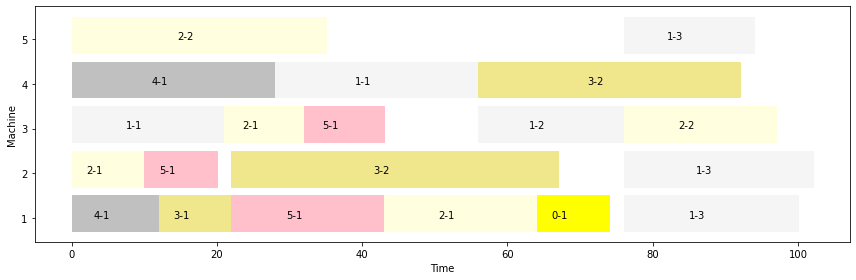

In [37]:
# gantt
# m_cnt = jobDicts['machineCnt']
import datetime
import matplotlib.pyplot as plt
colorbox = ['yellow', 'whitesmoke', 'lightyellow',
            'khaki', 'silver', 'pink', 'lightgreen', 'orange', 'grey', '#8ca8df', 'brown']

for i in range(100):
    colorArr = ['1', '2', '3', '4', '5', '6', '7',
                '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0, 14)]
    colorbox.append("#" + color)

zzl = plt.figure(figsize=(12, 4))

mcnt = 0
for i in gantt:
    for j in i:
        mText = mcnt + 1.5
        mPoint1 = j[1]
        mPoint2 = j[2]
        Word = j[0]
        x1 = mPoint1
        y1 = mText - 0.8
        x2 = mPoint2
        y2 = mText - 0.8
        x3 = mPoint2
        y3 = mText
        x4 = mPoint1
        y4 = mText
        
        color_per_job = int(j[0][:j[0].find('-')])
        plt.fill([x1, x2, x3, x4], [y1, y2, y3, y4],
                 color=colorbox[color_per_job])
        plt.text(0.5 * mPoint1 + 0.5 * mPoint2 - 3, mText - 0.5, Word)
        
    mcnt += 1
        
plt.xlabel('Time')
plt.ylabel('Machine')
plt.tight_layout()
plt.show()